### Import Packages and Download Dataset

In [94]:
import kagglehub
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [56]:
PATH = kagglehub.dataset_download("asefjamilajwad/car-crash-dataset-ccd")
print(PATH)

C:\Users\jessi\.cache\kagglehub\datasets\asefjamilajwad\car-crash-dataset-ccd\versions\2


### Load Data and Preprocessing

In [57]:
DATA_PATH = os.path.join(PATH, "CrashBest")
TABLE_PATH = os.path.join(PATH, "Crash_Table.csv")

TARGET_SIZE = (224, 224)

In [58]:
df = pd.read_csv(TABLE_PATH)
df.head()

,vidname,frame_1,frame_2,frame_3,frame_4,frame_5,frame_6,frame_7,frame_8,frame_9,...,frame_46,frame_47,frame_48,frame_49,frame_50,startframe,youtubeID,timing,weather,egoinvolve
0,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,285,0,Day,Normal,Yes
1,2,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,646,0,Day,Normal,Yes
2,3,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,972,0,Day,Normal,Yes
3,4,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1257,0,Day,Normal,Yes
4,5,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,462,10,Day,Snowy,Yes


In [59]:
df_sampled = df.sample(100, random_state=40)

In [60]:
def get_file_name(video_name, frame_name):
  return f"C_{video_name:06}_{frame_name:02}.jpg"

def get_video_frame_paths(video_name):
  frame_paths = []
  for i in range (1, 51):
    frame_path = os.path.join(DATA_PATH, get_file_name(video_name, i))
    frame_paths.append(frame_path)
  return frame_paths

In [61]:
video_names = []
raw_images =[]
labels = []
timings = []

for idx, row in df_sampled.iterrows():
  frame_paths = get_video_frame_paths(row["vidname"])
  if all(os.path.exists(frame_path) for frame_path in frame_paths):
    for frame_path in frame_paths:
      image = cv2.imread(frame_path)
      image = cv2.resize(image, TARGET_SIZE)
      raw_images.append(image)
      
    for i in range(1, 51):
      labels.append(row[f"frame_{i}"])
      timings.append(row["timing"])
      video_names.append(row["vidname"])

print("Length of video_names: ", len(video_names))
print("Length of image_paths: ", len(raw_images))
print("Length of labels: ", len(labels))
print("Length of timings: ", len(timings))

Length of video_names:  5000
Length of image_paths:  5000
Length of labels:  5000
Length of timings:  5000


In [99]:
def preprocess_image(image):
  lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
  l, a, b = cv2.split(lab)
  clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
  l_clahe = clahe.apply(l)

  image_clahe = cv2.merge([l_clahe, a, b])
  image_clahe = cv2.cvtColor(image_clahe, cv2.COLOR_LAB2BGR)
  
  return image_clahe

In [91]:
day_image = None
night_image = None

for idx, (image, timing) in enumerate(zip(raw_images, timings)):
    if timing == 'Day' and day_image is None:
        day_image = image
    elif timing == 'Night' and night_image is None:
        night_image = image
    
    if day_image is not None and night_image is not None:
        break

In [92]:
def show_images(images, titles):
    plt.figure(figsize=(15, 5))
    
    for i, (img, title) in enumerate(zip(images, titles), 1):
        plt.subplot(1, len(images), i)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

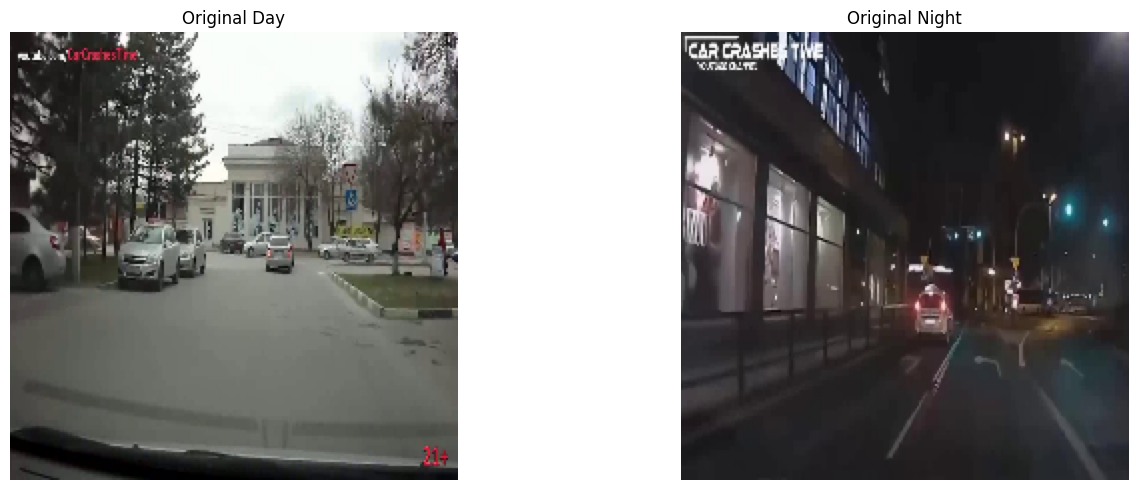

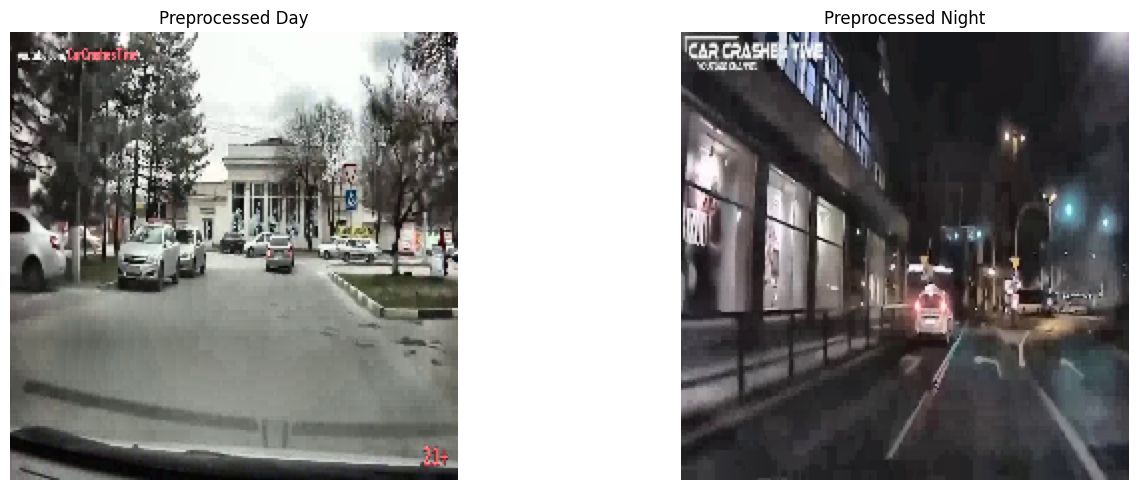

In [101]:
show_images([day_image, night_image], ['Original Day', 'Original Night'])

day_preprocessed = preprocess_image(day_image)
night_preprocessed = preprocess_image(night_image)

show_images([day_preprocessed, night_preprocessed], ['Preprocessed Day', 'Preprocessed Night'])